Import semua module yang dibutuhkan seperti matplotlib untuk plotting, seaborn utuk graph, cv2 untuk read image, dan PIL untuk menggunakan cv2

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd
from PIL import Image


cek total berapa banyak data image yang terdapat dalam dataset

In [3]:
image_folder = "../dataset_img"
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
print(f"Total images: {len(image_files)}")

Total images: 1125


Buat list untuk menampung metadaata dari image yang nantinya akan ditampung di dalam file csv untuk melihat keseluruhan metadata dari setiap dataset image yang ada

In [4]:
metadata = []

for image in image_files:
    file_path = os.path.join(image_folder, image)
    file_size = os.path.getsize(file_path)
    with Image.open(file_path) as img:
        width, height = img.size  
    metadata.append({'Filename': image, 'FileSize': file_size, 'Width': width, 'Height': height})

metadata_df = pd.DataFrame(metadata)
print(metadata_df.head())


        Filename  FileSize  Width  Height
0    cloudy1.jpg     15348    600     400
1   cloudy10.jpg      5231    271     186
2  cloudy100.jpg      7651    259     194
3  cloudy101.jpg      6195    338     149
4  cloudy102.jpg     81503    800     377


Plot menggunakan seaborn untuk melihat distribusi dari ukuran file yang terdapat pada dataset, bisa dilihat distribusi terbanyak ada pada jumlah file dengan ukuran dibawah 1 megabytes, dan semakin besar file semakin dikit file yang terdapat pada dataset

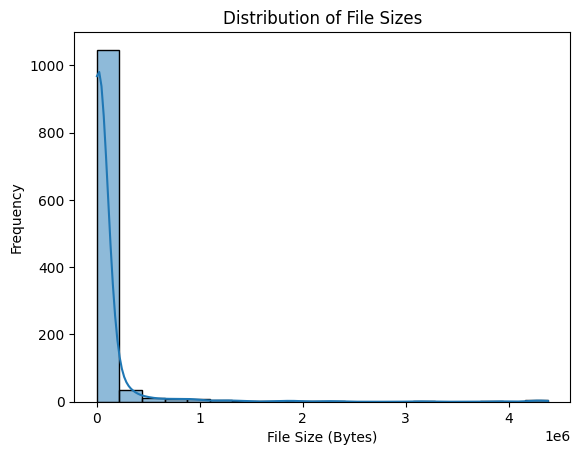

In [5]:
sns.histplot(metadata_df['FileSize'], bins=20, kde=True)
plt.title('Distribution of File Sizes')
plt.xlabel('File Size (Bytes)')
plt.ylabel('Frequency')
plt.show()

Plotting untuk melihat rata rata ratio ukuran image dataset, terlihat pola dari scatter plot tersebut

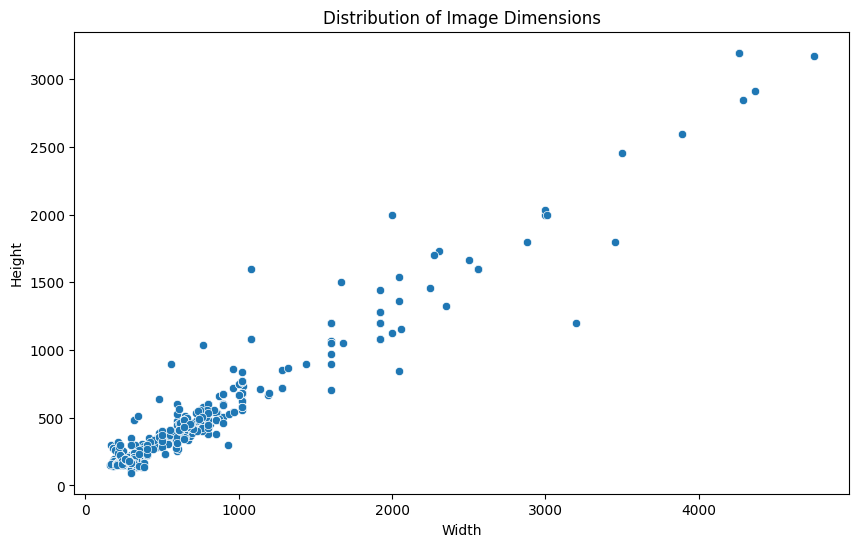

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Width', y='Height', data=metadata_df)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

Pada tahap ini akan dilakukan pengambilan 5 sample images yang terdapat pada dataset, dari dataset yang ada, terdapat 4 buah variable target, dan jika kita lihat pada color histogram bahwa nilai pixel intensity yang memiliki frequency yang tinggi/sering muncul ada pada nilai 50 atau gray color

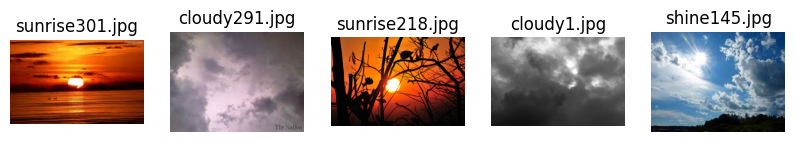

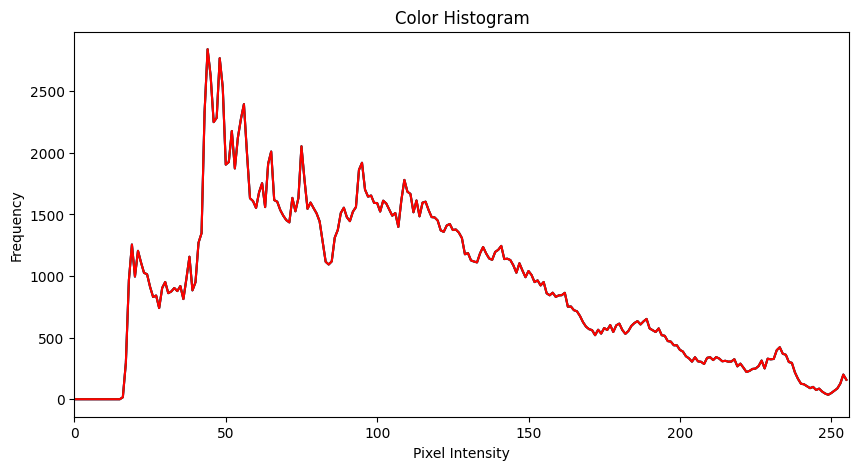

In [13]:
sample_images = metadata_df.sample(5)

plt.figure(figsize=(10, 10))
for i, row in enumerate(sample_images.itertuples(), 1):
    image_path = os.path.join(image_folder, row.Filename)
    img = Image.open(image_path)
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(row.Filename)
plt.show()

image_path = os.path.join(image_folder, image_files[0])
img = cv2.imread(image_path)
colors = ('b', 'g', 'r') 

plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Pada tahap ini kita dapat melihat jika kita setup cluster menjadi 3 cluster maka terdapat pola yang sangat jelas, image dengan ukuran kecil, sedang dan besar, dengan image ukuran besar memiliki rentang yang sangat luas mulai dari 2000 hingga 4000 pada lebar dan 1000 hingga 3000 pada tingginya

c:\Users\oi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


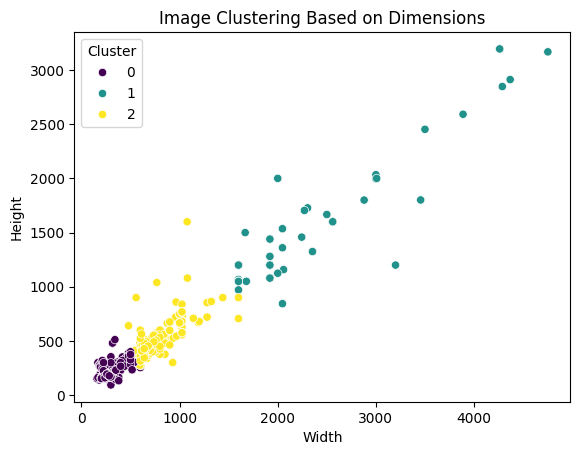

In [10]:
from sklearn.cluster import KMeans
import numpy as np

dimensions = metadata_df[['Width', 'Height']].values
kmeans = KMeans(n_clusters=3, random_state=42).fit(dimensions)

metadata_df['Cluster'] = kmeans.labels_
sns.scatterplot(x='Width', y='Height', hue='Cluster', data=metadata_df, palette='viridis')
plt.title('Image Clustering Based on Dimensions')
plt.show()

In [11]:
def is_grayscale(image_path):
    img = Image.open(image_path).convert('RGB')
    np_img = np.array(img)
    return np.all(np_img[..., 0] == np_img[..., 1]) and np.all(np_img[..., 1] == np_img[..., 2])

metadata_df['IsGrayscale'] = metadata_df['Filename'].apply(lambda x: is_grayscale(os.path.join(image_folder, x)))
print(metadata_df['IsGrayscale'].value_counts())

IsGrayscale
False    1098
True       27
Name: count, dtype: int64


Pada tahap akhir kita akan memasukan seluruh metadata yang ada ke dalam file csv sehingga semua metadata dataset image dapat dilihat dengan mudah

In [12]:
metadata_df.to_csv('image_metadata.csv', index=False)

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Simulasi Dataset
# Dataset seharusnya memiliki kolom untuk polutan dan kolom target untuk penyakit.
data = {
    'co': [0.3, 0.5, 0.2, 0.6, 0.1],  # contoh data CO
    'no': [0.1, 0.3, 0.2, 0.4, 0.5],  # contoh data NO
    'no2': [0.2, 0.4, 0.3, 0.5, 0.7],  # contoh data NO2
    'o3': [0.03, 0.05, 0.07, 0.06, 0.08],  # contoh data O3
    'so2': [0.01, 0.02, 0.03, 0.01, 0.02],  # contoh data SO2
    'pm2_5': [10, 20, 15, 25, 30],  # contoh data PM2.5
    'pm10': [50, 60, 55, 65, 70],  # contoh data PM10
    'nh3': [0.03, 0.05, 0.02, 0.04, 0.06],  # contoh data NH3
    'disease': [1, 0, 0, 1, 1]  # 1 untuk ada penyakit, 0 untuk tidak ada penyakit (binary target)
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Fitur dan target
X = df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]  # Kolom polutan
y = df['disease']  # Kolom penyakit (target)

# Pembagian data ke dalam data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Evaluasi hasil
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Fungsi untuk memprediksi penyakit berdasarkan polutan
def predict_disease(co, no, no2, o3, so2, pm2_5, pm10, nh3):
    input_data = [[co, no, no2, o3, so2, pm2_5, pm10, nh3]]
    prediction = model.predict(input_data)
    if prediction == 1:
        return "Penyakit Terdeteksi (Kemungkinan Penyakit: Keracunan Karbon Monoksida, Asma, dll.)"
    else:
        return "Tidak Ada Penyakit Terdeteksi"

# Contoh prediksi dengan polutan tertentu
result = predict_disease(0.6, 0.4, 0.5, 0.06, 0.02, 25, 60, 0.05)
print("\nHasil Prediksi:")
print(result)


Akurasi: 0.00

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Hasil Prediksi:
Penyakit Terdeteksi (Kemungkinan Penyakit: Keracunan Karbon Monoksida, Asma, dll.)


c:\Users\Paskal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Paskal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Paskal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi